In [70]:
from matplotlib import pyplot as plt  
import numpy as np  
import pandas as pd 
import rasterio 
import xarray as xr 
import rioxarray 
from sklearn import metrics
from mesma.core import mesma, hard_classification 

In [71]:
# read GAO image classification
GAO_classification = rioxarray.open_rasterio("C:\\Users\\mkoenig3\\Dropbox (ASU)\\Backup\\Downloads\\2022_PHX\\SOL\\20221221_23EM\\GAO20220716t191531p0000_iacorn_refl_ort_sub_classification.tif")

# read simulated Tanager classification
Tanager_classification = rioxarray.open_rasterio("C:\\Users\\mkoenig3\\Dropbox (ASU)\\Backup\\Downloads\\2022_PHX\\GAO\\GAO20220716t191531p0000\\GAO20220716t191531p0000_tanv1_iacorn_refl_ort_classification.tif")

In [90]:
# resample GAO_classification to simulated Tanager grid using 'mode'
GAO_classification_resampled = GAO_classification.rio.reproject_match(match_data_array=Tanager_classification, 
                                                                      resampling = rasterio.enums.Resampling.mode)
# Drop NoData pixels (-9999) from resampled data
GAO_classification_resampled = GAO_classification_resampled.where(GAO_classification_resampled!=-9999, drop=True)

# Crop simulated Tanager data to same extent
Tanager_classification = Tanager_classification.where(GAO_classification_resampled!=-9999, drop=True)

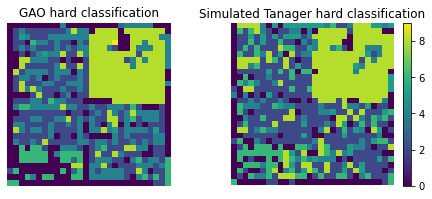

In [117]:
plt.figure(2, figsize=(8,3))
plt.subplot(1, 2, 1)
plt.imshow(GAO_classification_resampled[0], vmin=0, vmax=9)
plt.title('GAO hard classification')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(Tanager_classification[0], vmin=0, vmax=9)
plt.title('Simulated Tanager hard classification')
plt.axis('off')
plt.colorbar()
plt.show()

In [94]:
print(metrics.classification_report(GAO_classification_resampled.data.ravel(), Tanager_classification.data.ravel(), ))

              precision    recall  f1-score   support

         0.0       0.67      0.47      0.55       177
         2.0       0.52      0.66      0.58       200
         3.0       0.00      0.00      0.00         3
         4.0       0.42      0.17      0.25       179
         5.0       0.02      0.25      0.04         4
         6.0       0.27      0.49      0.35        45
         8.0       0.69      0.81      0.74       175
         9.0       0.00      0.00      0.00         1

    accuracy                           0.52       784
   macro avg       0.32      0.36      0.31       784
weighted avg       0.55      0.52      0.51       784



C:\Users\mkoenig3\Anaconda3\envs\CarbonMapper_py3713\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mkoenig3\Anaconda3\envs\CarbonMapper_py3713\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mkoenig3\Anaconda3\envs\CarbonMapper_py3713\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif